In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/drugtest8.csv')

In [ ]:
data = pd.read_csv(r"C:\Users\sreeh\DSA\Internship\drugtest8.csv")

In [5]:
data.head()

,Race,Gender,Age,Drug Use,Side Effects
0,African American,Male,21.0,High,Severe
1,Other,Male,46.0,High,Severe
2,Asian,Male,42.0,High,Severe
3,Caucasian,Female,31.0,Medium,Moderate
4,Caucasian,Male,36.0,Low,Moderate


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Race          400000 non-null  object 
 1   Gender        400000 non-null  object 
 2   Age           395901 non-null  float64
 3   Drug Use      400000 non-null  object 
 4   Side Effects  400000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 15.3+ MB


In [7]:
data['Age'].describe()

count    395901.000000
mean         39.691377
std          15.001845
min           0.000000
25%          29.000000
50%          40.000000
75%          50.000000
max          97.000000
Name: Age, dtype: float64

In [8]:
data_age_0 = data[data['Age'] == 0]
count = len(data_age_0)
print(count)

1721


In [9]:
print((count/data.shape[0])*100,'% of the dataset has the age 0')

0.43024999999999997 % of the dataset has the age 0


In [10]:
data.head()

,Race,Gender,Age,Drug Use,Side Effects
0,African American,Male,21.0,High,Severe
1,Other,Male,46.0,High,Severe
2,Asian,Male,42.0,High,Severe
3,Caucasian,Female,31.0,Medium,Moderate
4,Caucasian,Male,36.0,Low,Moderate


In [11]:
data.drop(data[data['Age']==0].index, axis=0, inplace=True)

In [12]:
data.describe()

,Age
count,394180.000000
mean,39.864671
std,14.803028
min,1.000000
25%,30.000000
50%,40.000000
75%,50.000000
max,97.000000


Thus we have dropped the rows where Age was zero as it brought uncertainity in the data.

Now let us see how the Age column in distributed.

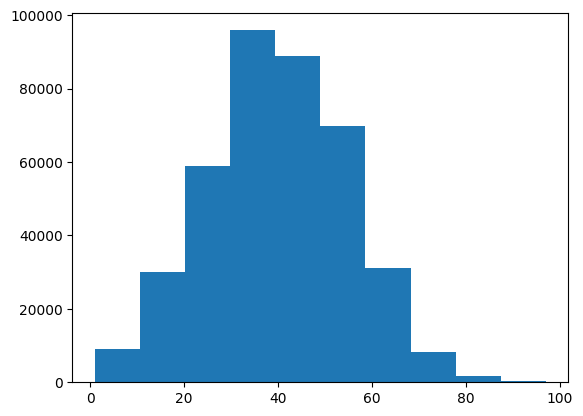

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['Age'])
plt.show()

As the distribution is almost normal we will use mean to fill the missing values.

In [14]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [15]:
data.isna().sum()

Race            0
Gender          0
Age             0
Drug Use        0
Side Effects    0
dtype: int64

In [16]:
data['Age'] = data['Age'].astype(int)

In [17]:
data.head()

,Race,Gender,Age,Drug Use,Side Effects
0,African American,Male,21,High,Severe
1,Other,Male,46,High,Severe
2,Asian,Male,42,High,Severe
3,Caucasian,Female,31,Medium,Moderate
4,Caucasian,Male,36,Low,Moderate


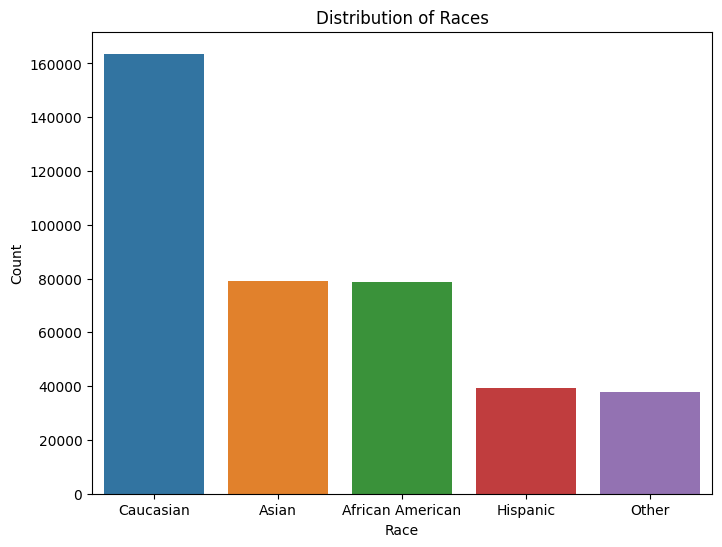

In [18]:
# Check the distribution of the races
race_counts = data['Race'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Distribution of Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

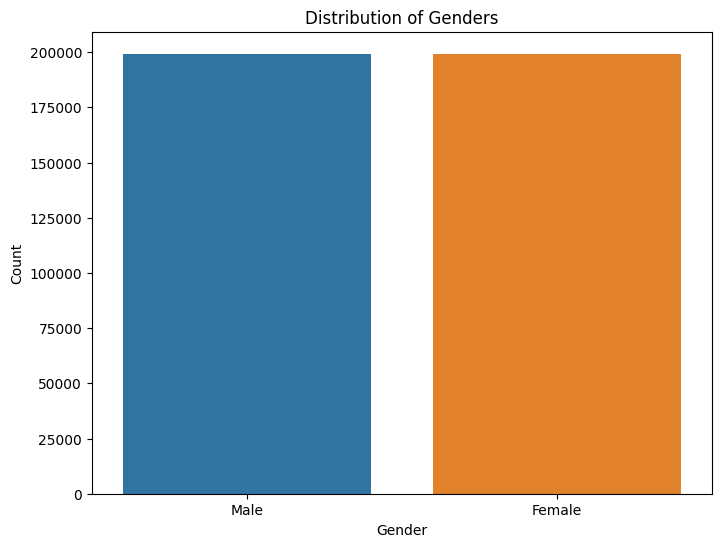

In [19]:
# Check how the gender is distributed
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

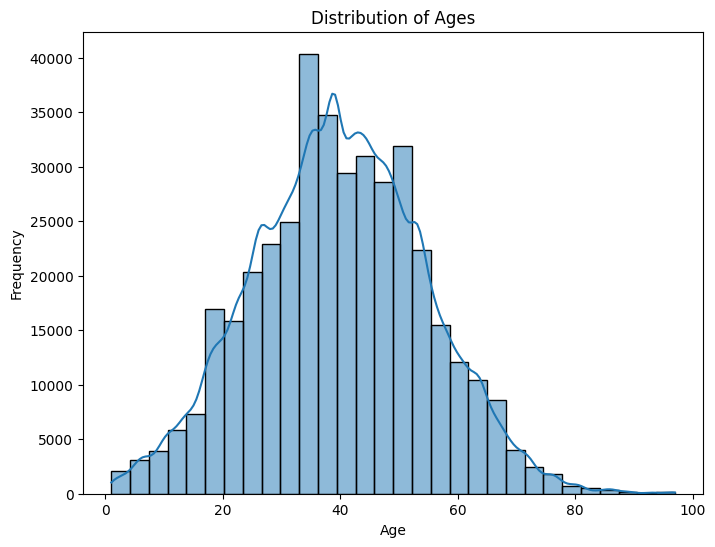

In [20]:
# Check the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

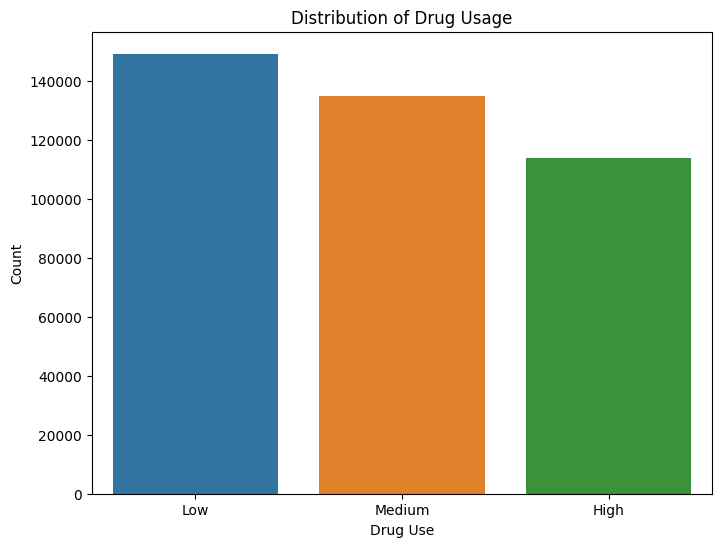

In [21]:
# How the drug usage is distributed
drug_usage_counts = data['Drug Use'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=drug_usage_counts.index, y=drug_usage_counts.values)
plt.title('Distribution of Drug Usage')
plt.xlabel('Drug Use')
plt.ylabel('Count')
plt.show()

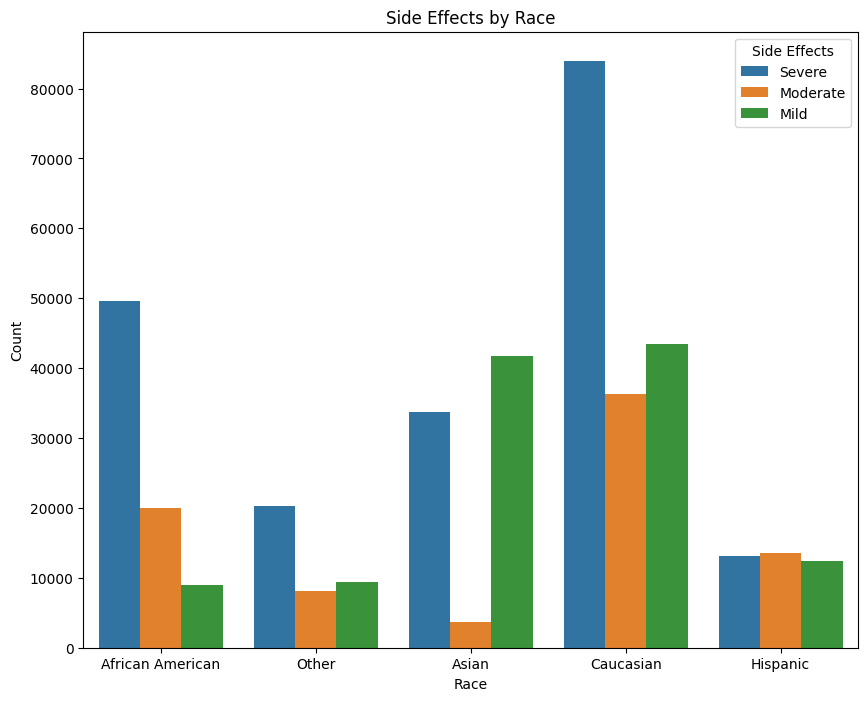

In [22]:
# Side effects by race
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Race', hue='Side Effects')
plt.title('Side Effects by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

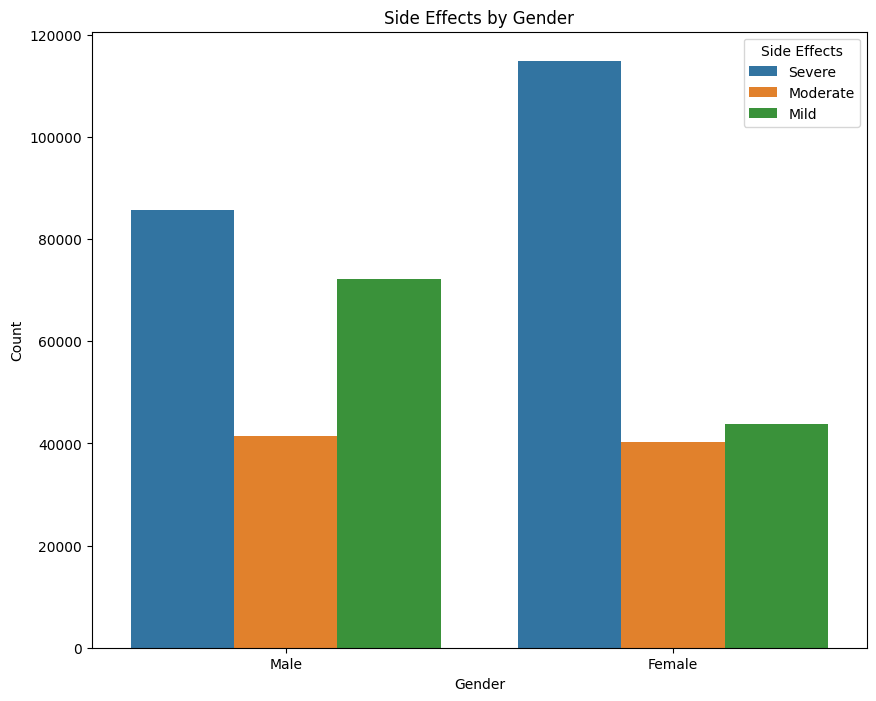

In [23]:
# Gender and how it affects side effects
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Gender', hue='Side Effects')
plt.title('Side Effects by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

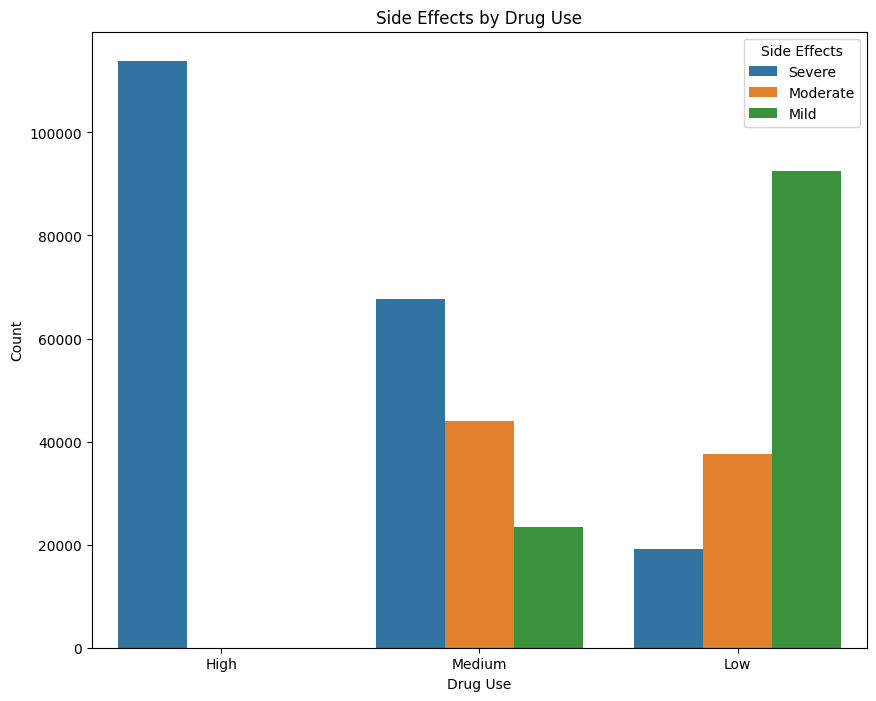

In [24]:
# Side effects when the frequency of usage is factored in
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Drug Use', hue='Side Effects')
plt.title('Side Effects by Drug Use')
plt.xlabel('Drug Use')
plt.ylabel('Count')
plt.show()

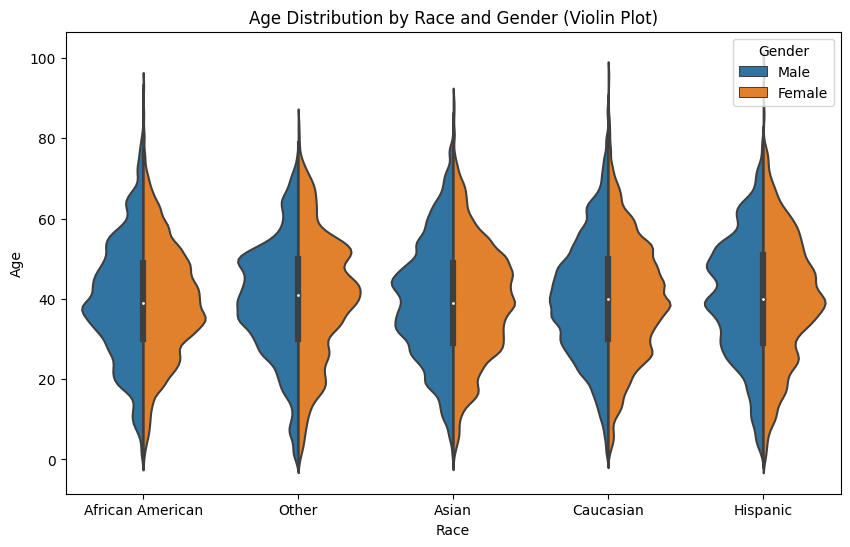

In [25]:
# Age distribution by Race and Gender
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Race', y='Age', hue='Gender', split=True)
plt.title('Age Distribution by Race and Gender (Violin Plot)')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()

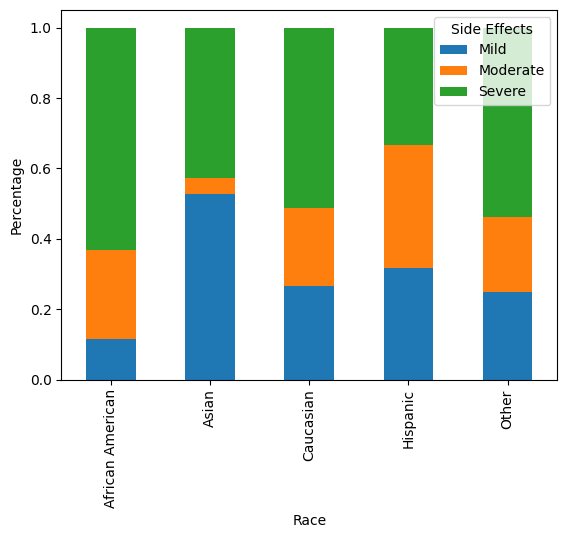

In [26]:
# Relation between Race and Side Effects
sscore=pd.crosstab(data['Race'],data['Side Effects'])
sscore.div(sscore.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.show()

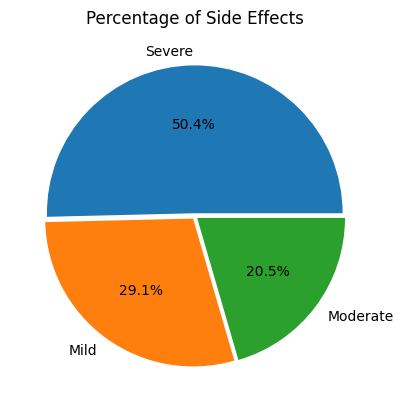

In [27]:
# Distribution of Side Effects
side_effect_counts = data['Side Effects'].value_counts()
total_count = side_effect_counts.sum()
percentage_values = (side_effect_counts / total_count) * 100
explode = [0.02] * len(percentage_values)
plt.pie(percentage_values, labels=percentage_values.index, autopct='%1.1f%%', explode=explode)
plt.title('Percentage of Side Effects')
plt.show()

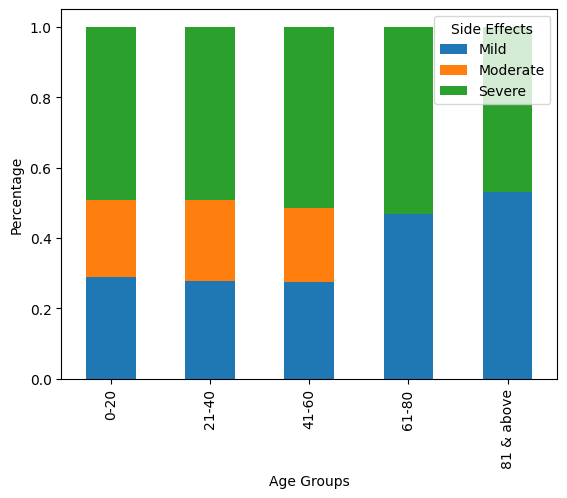

In [28]:
# Relation between Age Group and Side Effects
bins=[0,21,41,61,81,101]
group=['0-20','21-40','41-60','61-80','81 & above']
data['Age Group']=pd.cut(data['Age'],bins=bins,labels=group)
hspend=pd.crosstab(data['Age Group'],data['Side Effects'])
hspend.div(hspend.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
plt.show()

In [29]:
data.drop("Age Group", axis =1, inplace = True)

In [30]:
# Data Encoding
gender_dummies = pd.get_dummies(data['Gender'], prefix='Gender')
race_dummies = pd.get_dummies(data['Race'], prefix='Race')
usage_dummies = pd.get_dummies(data['Drug Use'], prefix='Drug Use')
data = data.drop(['Gender', 'Race','Drug Use'], axis=1)
data = pd.concat([data, gender_dummies, race_dummies, usage_dummies], axis=1)

In [31]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(data['Age'].values.reshape(-1, 1))

In [32]:
# Seperating the data to get the Target feature
X = data.drop(['Side Effects'], axis=1)
y = data['Side Effects']

In [33]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [34]:
# Splitting the data into Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# Creating a Logistic Regression model and displaying the Accuracy Metrics
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("Precision = ",precision_score(y_test,y_pred,average=None))
print("Recall = ",recall_score(y_test,y_pred,average=None))
print("F1 Score", f1_score(y_test,y_pred,average=None))

Accuracy =  0.7014579357905661
Precision =  [0.6455718  0.42365293 0.82597554]
Recall =  [0.75220122 0.32573864 0.82434318]
F1 Score [0.69481939 0.36829912 0.82515855]


In [ ]:
# Creating a Random Forest Classifier model and display the Accruacy Metrics.
from sklearn.ensemble import RandomForestClassifier
RModel=RandomForestClassifier(n_estimators=100, random_state=42)
RModel.fit(X_train,y_train)
y_pred=RModel.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("Precision = ",precision_score(y_test,y_pred,average=None))
print("Recall = ",recall_score(y_test,y_pred,average=None))
print("F1 Score", f1_score(y_test,y_pred,average=None))

Accuracy =  0.7867329516922767
Precision =  [0.76750723 0.61329037 0.84530912]
Recall =  [0.79872085 0.45232144 0.9153187 ]
F1 Score [0.78280301 0.5206481  0.87892198]


In [ ]:
# Creating a Adaboost Classifier model and display the Accuracy Metrics.
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(n_estimators=200, random_state=42)
ab_model.fit(X_train, y_train)
ab_predictions = ab_model.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,ab_predictions))
print("Precision = ",precision_score(y_test,ab_predictions,average=None))
print("Recall = ",recall_score(y_test,ab_predictions,average=None))
print("F1 Score", f1_score(y_test,ab_predictions,average=None))

Accuracy =  0.6832295537477822
Precision =  [0.64115563 0.38042064 0.79403537]
Recall =  [0.67467806 0.28758759 0.8485236 ]
F1 Score [0.65748983 0.32755362 0.82037572]


In [ ]:
# Creating a Gradient Boost Classifier model and display the Accuracy Metrics.
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_pred = gb_classifier.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,gb_pred))
print("Precision = ",precision_score(y_test,gb_pred,average=None))
print("Recall = ",recall_score(y_test,gb_pred,average=None))
print("F1 Score", f1_score(y_test,gb_pred,average=None))

Accuracy =  0.7408355930501155
Precision =  [0.7414614  0.47391886 0.80043164]
Recall =  [0.7191327  0.30492153 0.9300661 ]
F1 Score [0.73012638 0.37108518 0.8603933 ]


In [ ]:
import optuna
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])


    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )


    rf.fit(X_train, y_train)


    y_pred = rf.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100,n_jobs=4)

[I 2023-10-08 18:26:26,152] A new study created in memory with name: no-name-5452687a-8049-4013-ba4a-400dbeae88b5
[I 2023-10-08 18:26:57,327] Trial 3 finished with value: 0.7476733286465134 and parameters: {'n_estimators': 163, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 17, 'criterion': 'gini'}. Best is trial 3 with value: 0.7476733286465134.
[I 2023-10-08 18:27:16,581] Trial 1 finished with value: 0.7638679655853503 and parameters: {'n_estimators': 234, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 1 with value: 0.7638679655853503.
[I 2023-10-08 18:27:22,106] Trial 0 finished with value: 0.7695423655050049 and parameters: {'n_estimators': 248, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 17, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7695423655050049.
[I 2023-10-08 18:27:27,029] Trial 2 finished with value: 0.7633741756218406 and parameters: {'n_estimators': 282, 'max_depth': 10, 'min

[I 2023-10-08 18:32:06,903] Trial 33 finished with value: 0.7741706002477319 and parameters: {'n_estimators': 233, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 8, 'criterion': 'gini'}. Best is trial 7 with value: 0.7863479629071675.
[I 2023-10-08 18:32:15,045] Trial 34 finished with value: 0.7863479629071675 and parameters: {'n_estimators': 230, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 7 with value: 0.7863479629071675.
[I 2023-10-08 18:32:27,744] Trial 35 finished with value: 0.7863479629071675 and parameters: {'n_estimators': 231, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 7 with value: 0.7863479629071675.
[I 2023-10-08 18:32:41,297] Trial 37 finished with value: 0.7863814401928292 and parameters: {'n_estimators': 147, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 37 with value: 0.78638144019282

[I 2023-10-08 18:39:02,103] Trial 66 finished with value: 0.7862559003715979 and parameters: {'n_estimators': 242, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 50 with value: 0.7865069800140605.
[I 2023-10-08 18:39:06,061] Trial 68 finished with value: 0.7861136219075358 and parameters: {'n_estimators': 212, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 14, 'criterion': 'gini'}. Best is trial 50 with value: 0.7865069800140605.
[I 2023-10-08 18:39:08,596] Trial 67 finished with value: 0.7862559003715979 and parameters: {'n_estimators': 239, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 50 with value: 0.7865069800140605.
[I 2023-10-08 18:39:22,614] Trial 69 finished with value: 0.7855612466941181 and parameters: {'n_estimators': 213, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 14, 'criterion': 'gini'}. Best is trial 50 with value: 0.7865069800

[I 2023-10-08 18:44:47,094] Trial 99 finished with value: 0.7865404572997221 and parameters: {'n_estimators': 221, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 99 with value: 0.7865404572997221.


In [ ]:
# Display the best parameters
best_params = study.best_params
best_accuracy = study.best_value

print(f'Best Parameters: {best_params}')
print(f'Best Accuracy: {best_accuracy}')

Best Parameters: {'n_estimators': 221, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 12, 'criterion': 'gini'}
Best Accuracy: 0.7865404572997221


In [ ]:
# Create a new model with the best parameters
final_rf = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    criterion=best_params["criterion"],
    random_state=42
)
final_rf.fit(X_train, y_train)
y_pred = final_rf.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))

Accuracy =  0.7865404572997221


Deep Learning

In [37]:
# Calculating the number of unique values in Side Effects.
num_classes = len(data['Side Effects'].unique())


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Define the model with the correct output layer for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Change num_classes to the number of classes in your problem
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test, y_test_onehot))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10
9335/9335 [==============================] - 53s 5ms/step - loss: 0.5234 - accuracy: 0.7189 - val_loss: 0.4814 - val_accuracy: 0.7334
Epoch 2/10
9335/9335 [==============================] - 40s 4ms/step - loss: 0.4914 - accuracy: 0.7277 - val_loss: 0.4818 - val_accuracy: 0.7344
Epoch 3/10
9335/9335 [==============================] - 41s 4ms/step - loss: 0.4887 - accuracy: 0.7286 - val_loss: 0.4794 - val_accuracy: 0.7311
Epoch 4/10
9335/9335 [==============================] - 40s 4ms/step - loss: 0.4882 - accuracy: 0.7291 - val_loss: 0.4806 - val_accuracy: 0.7343
Epoch 5/10
9335/9335 [==============================] - 43s 5ms/step - loss: 0.4874 - accuracy: 0.7293 - val_loss: 0.4803 - val_accuracy: 0.7299
Epoch 6/10
9335/9335 [==============================] - 45s 5ms/step - loss: 0.4868 - accuracy: 0.7285 - val_loss: 0.4783 - val_accuracy: 0.7336
Epoch 7/10
9335/9335 [==============================] - 44s 5ms/step - loss: 0.4862 - accuracy: 0.7290 - val_loss: 0.4787 - val_ac